<a href="https://colab.research.google.com/github/Homagn/colabs/blob/main/holistic_edge_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This colab shows how to use ***mlfactory*** for easy generic edge detection (detect high level edges like a human perceives) using the HED neural network framework

In [3]:
!pip install mlfactory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 7.9 MB/s eta 0:00:00


In [4]:
import getopt
import numpy
import PIL
import PIL.Image
import sys
import torch

from mlfactory.models.pytorch import hed

local testing 
got main package location  /usr/local/lib/python3.10/dist-packages/mlfactory


In [14]:
#define the small and easy estimation function
def estimate(tenInput):

    #This will automatically check and download pretrained weights maintained by Homagni
    netNetwork = hed.get_pretrained_model().cuda().eval()

    intWidth = tenInput.shape[2]
    intHeight = tenInput.shape[1]

    assert(intWidth == 480) # remember that there is no guarantee for correctness, comment this line out if you acknowledge this and want to continue
    assert(intHeight == 320) # remember that there is no guarantee for correctness, comment this line out if you acknowledge this and want to continue

    return netNetwork(tenInput.cuda().view(1, 3, intHeight, intWidth))[0, :, :, :].cpu()

lets upload an image and have it saved as car.jpg in the colab workspace

In [6]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving car.jpg to car.jpg


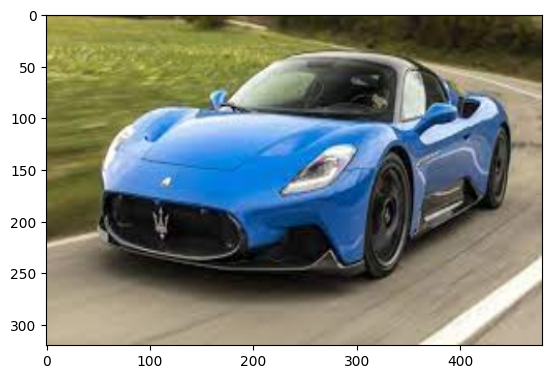

In [13]:
#lets check the original image on colab
import matplotlib.pyplot as plt
img = plt.imread('car.jpg')
plt.imshow(img)

In [11]:
torch.set_grad_enabled(False) # make sure to not compute gradients for computational performance
torch.backends.cudnn.enabled = True # make sure to use cudnn for computational performance


arguments_strIn = 'car.jpg' # './images/sample.png'
arguments_strOut = './out.png'

#remember to resize the image to (480,320)
import cv2
a = cv2.imread(arguments_strIn)
a = cv2.resize(a,(480,320))
cv2.imwrite('car.jpg', a)

#Run inference
#output would be saved as out.png
tenInput = torch.FloatTensor(numpy.ascontiguousarray(numpy.array(PIL.Image.open(arguments_strIn))[:, :, ::-1].transpose(2, 0, 1).astype(numpy.float32) * (1.0 / 255.0)))
tenOutput = estimate(tenInput)
PIL.Image.fromarray((tenOutput.clip(0.0, 1.0).numpy().transpose(1, 2, 0)[:, :, 0] * 255.0).astype(numpy.uint8)).save(arguments_strOut)

#Make sure to re-enable grads so that it doesnt create confusion later
torch.set_grad_enabled(True) # make sure to not compute gradients for computational performance



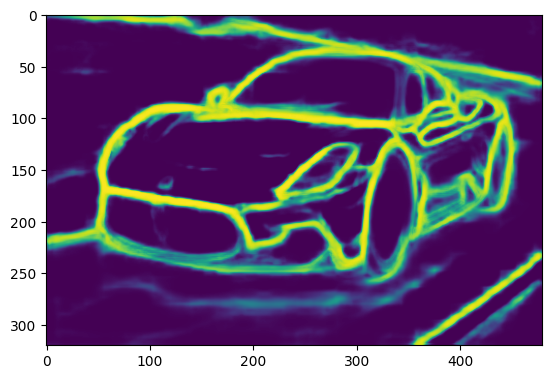

In [12]:
import matplotlib.pyplot as plt
img = plt.imread('out.png')
plt.imshow(img)